# Background

The fishing industry uses numerous measurements to describe a specific fish.  Our goal is to predict the weight of a fish based on a number of these measurements and determine if any of these measurements are insignificant in determining the weigh of a product.  See below for the description of these measurments.  

## Data Description

The data consists of the following variables:

1. **Weight**: weight of fish in g (numerical)
2. **Species**: species name of fish (categorical)
3. **Body.Height**: height of body of fish in cm (numerical)
4. **Total.Length**: length of fish from mouth to tail in cm (numerical)
5. **Diagonal.Length**: length of diagonal of main body of fish in cm (numerical)
6. **Height**: height of head of fish in cm (numerical)
7. **Width**: width of head of fish in cm (numerical)

## Read the data

In [3]:
# Import library you may need
library(car)
# Read the data set
fishfull = read.csv("Fish.csv",header=T, fileEncoding = 'UTF-8-BOM')
row.cnt = nrow(fishfull)
# Split the data into training and testing sets
fishtest = fishfull[(row.cnt-9):row.cnt,]
fish = fishfull[1:(row.cnt-10),]

*Please use fish as your data set for the following questions unless otherwise stated.*

# Question 1: Exploratory Data Analysis [8 points]

**(a) Create a box plot comparing the response variable, *Weight*, across the multiple *species*.  Based on this box plot, does there appear to be a relationship between the predictor and the response?**

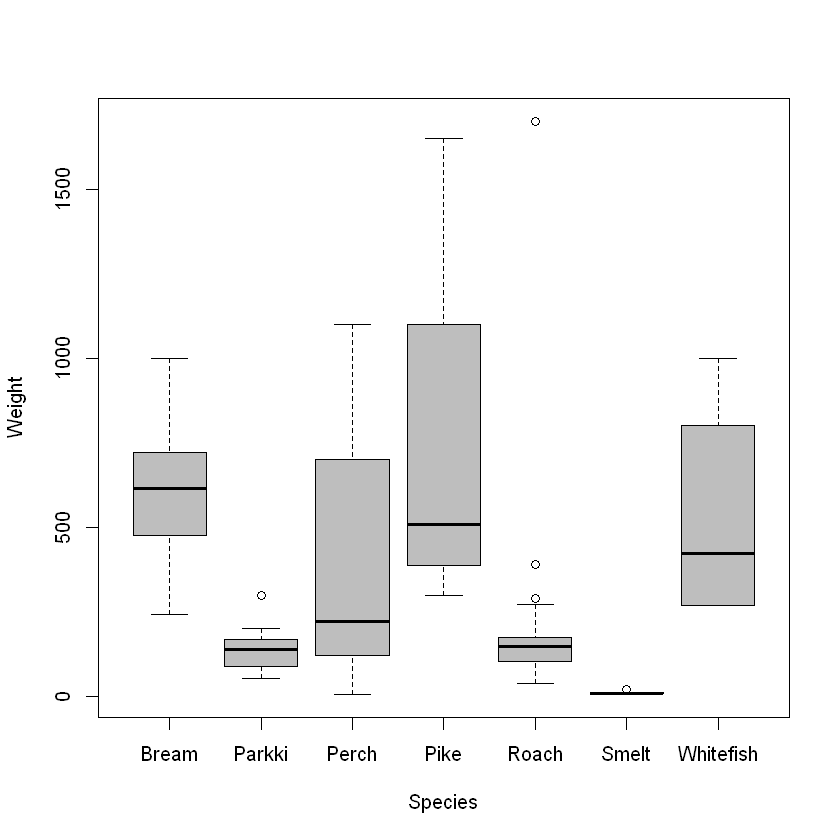

In [5]:
boxplot(Weight~Species, data=fish, col='grey')

There appears to be a relationship between the predictor and the response as the medians are different among all species.

**(b) Create scatterplots of the response, *Weight*, against each quantitative predictor, namely **Body.Height**, **Total.Length**, **Diagonal.Length**, **Height**, and **Width**.  Describe the general trend of each plot.  Are there any potential outliers?**

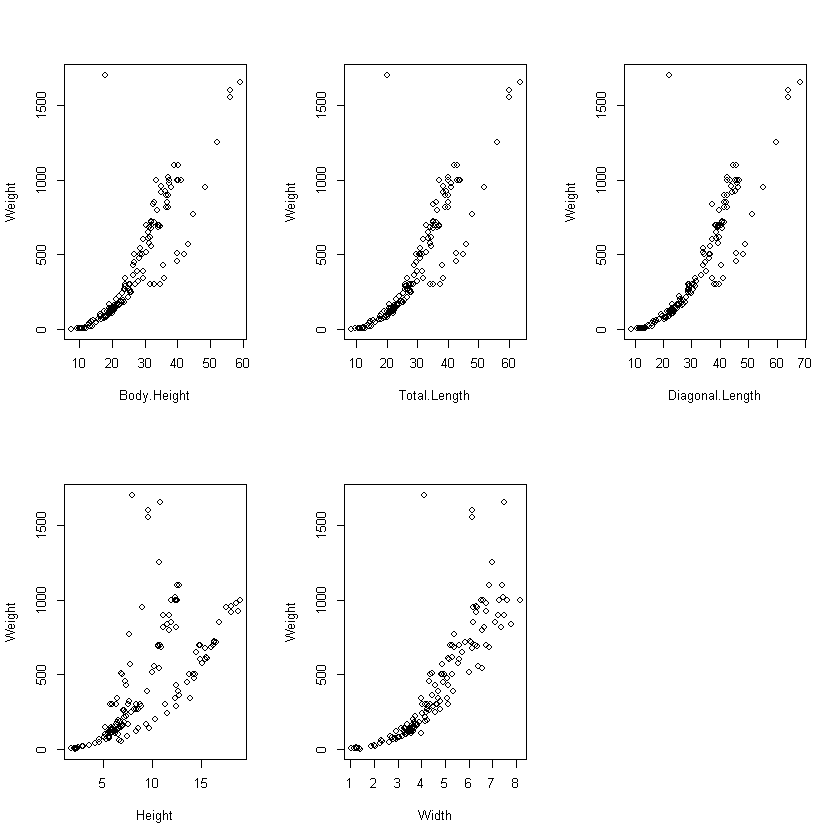

In [6]:
par(mfrow=c(2,3))
for (i in c(3:7)){
    col_name = names(fish[i])
    plot(fish[,i], fish$Weight, xlab= col_name, ylab = "Weight")}

All 5 predictors appear to have a positive relationship with Weight but not exactly linear. Additionally, there are potential outliers shown in all graphs with large weights and not as large predictor values. 

**(c) Display the correlations between each of the quantitative variables.  Interpret the correlations in the context of the relationships of the predictors to the response and in the context of multicollinearity.**

In [7]:
cor(fish[-2])


,Weight,Body.Height,Total.Length,Diagonal.Length,Height,Width
Weight,1.0000000,0.8616894,0.8654773,0.8688250,0.6879801,0.8456717
Body.Height,0.8616894,1.0000000,0.9995134,0.9919502,0.6268604,0.8661882
Total.Length,0.8654773,0.9995134,1.0000000,0.9940896,0.6422261,0.8728030
Diagonal.Length,0.8688250,0.9919502,0.9940896,1.0000000,0.7052116,0.8770361
Height,0.6879801,0.6268604,0.6422261,0.7052116,1.0000000,0.7908491
Width,0.8456717,0.8661882,0.8728030,0.8770361,0.7908491,1.0000000


Each predictor has a strong positive relationship with the response, weight. However, the predicting variables have strong correlation as well which means that multicollinearity is a potential issue. 

**(d) Based on this exploratory analysis, is it reasonable to assume a multiple linear regression model for the relationship between *Weight* and the predictor variables?**



Yes a multiple linear regression model is reasonable.

# Question 2: Fitting the Multiple Linear Regression Model [8 points]

*Create the full model without transforming the response variable or predicting variables using the fish data set.  Do not use fishtest*

**(a) Build a multiple linear regression model, called model1, using the response and all predictors.  Display the summary table of the model.**

In [8]:
model1<-lm(Weight~., data=fish)
summary(model1)



Call:
lm(formula = Weight ~ ., data = fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-211.37  -70.59  -23.50   42.42 1335.87 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -813.90     218.34  -3.728 0.000282 ***
SpeciesParkki       79.34     132.71   0.598 0.550918    
SpeciesPerch        10.41     206.26   0.050 0.959837    
SpeciesPike         16.76     233.06   0.072 0.942775    
SpeciesRoach       194.03     156.84   1.237 0.218173    
SpeciesSmelt       455.78     204.92   2.224 0.027775 *  
SpeciesWhitefish    28.31     164.91   0.172 0.863967    
Body.Height       -176.87      61.36  -2.882 0.004583 ** 
Total.Length       266.70      77.75   3.430 0.000797 ***
Diagonal.Length    -72.49      49.48  -1.465 0.145267    
Height              38.27      22.09   1.732 0.085448 .  
Width               29.63      40.54   0.731 0.466080    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error:

**(b) Is the overall regression significant at an $\alpha$ level of 0.01? Explain.**


We reject the null hypothesis (due to 2.2e-16 < a) and thus the model is statisticlly significant at a level of 0.01.

**(c) What is the coefficient estimate for *Body.Height*? Interpret this coefficient.**


Coefficient is -176.87; meaning for every centimeter increase in body height, weight decreases by 176.87 grams.

**(d) What is the coefficient estimate for the *Species* category Parkki? Interpret this coefficient.**



Coefficient is 79.34; meaning if the fish is a Parkki, it's expected weight increaes by 79.34 grams compared to Bream

# Question 3: Checking for Outliers and Multicollinearity [6 points]

**(a) Create a plot for the Cook's Distances. Using a threshold Cook's Distance of 1, identify the row numbers of any outliers.**

Observation 30 is the outler

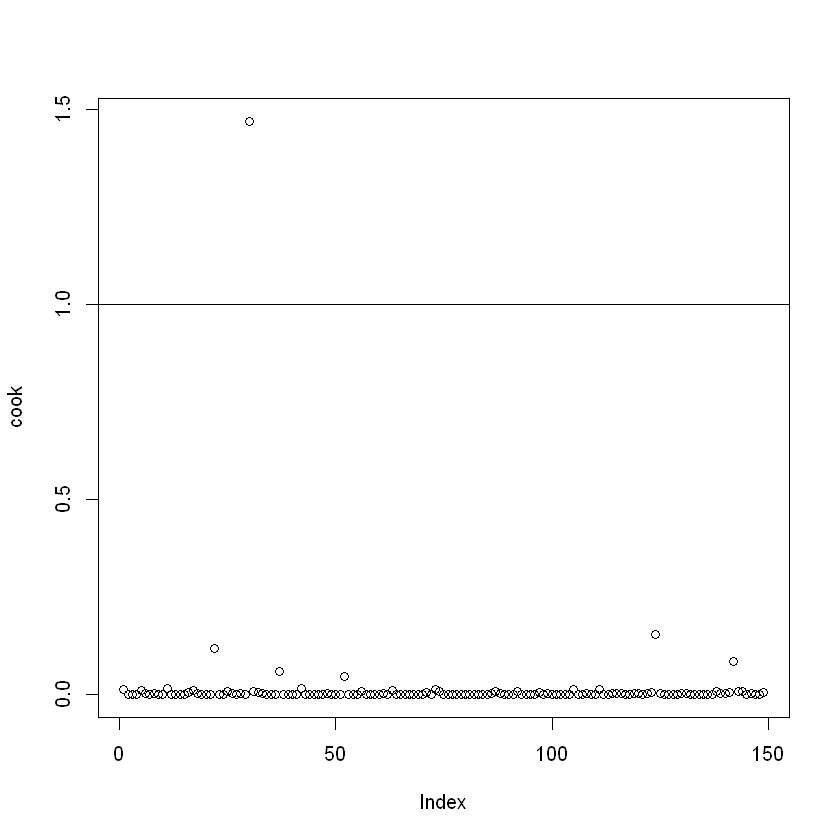

In [11]:
cook=cooks.distance(model1)

plot(cook)
abline(h=1)

cat("Observation", which(cook>1), "is the outler")

**(b) Remove the outlier(s) from the data set and create a new model, called model2, using all predictors with *Weight* as the response.  Display the summary of this model.**

In [12]:
fish2<-fish[-30,]
model2<-lm(Weight~., data=fish2)
summary(model2)



Call:
lm(formula = Weight ~ ., data = fish2)

Residuals:
    Min      1Q  Median      3Q     Max 
-211.10  -50.18  -14.44   34.04  433.68 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -969.766    131.601  -7.369 1.51e-11 ***
SpeciesParkki     195.500     80.105   2.441 0.015951 *  
SpeciesPerch      174.241    124.404   1.401 0.163608    
SpeciesPike      -175.936    140.605  -1.251 0.212983    
SpeciesRoach      141.867     94.319   1.504 0.134871    
SpeciesSmelt      489.714    123.174   3.976 0.000113 ***
SpeciesWhitefish  122.277     99.293   1.231 0.220270    
Body.Height       -76.321     37.437  -2.039 0.043422 *  
Total.Length       74.822     48.319   1.549 0.123825    
Diagonal.Length    34.349     30.518   1.126 0.262350    
Height             10.000     13.398   0.746 0.456692    
Width              -8.339     24.483  -0.341 0.733924    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error

**(c) Display the VIF of each predictor for model2. Using a VIF threshold of max(10, 1/(1-$R^2$) what conclusions can you draw?**

In [15]:
cat("VIF threshold:", max(10, 1/(1-summary(model2)$r.squared)))


VIF threshold: 16.25583

In [16]:
vif(model2)

,GVIF,Df,GVIF^(1/(2*Df))
Species,1545.55017,6,1.843983
Body.Height,2371.15420,1,48.694499
Total.Length,4540.47698,1,67.383062
Diagonal.Length,2126.64985,1,46.115614
Height,56.21375,1,7.497583
Width,29.01683,1,5.386727


Multicollinearity is high with all predictors using a VIF of 16.25583

# Question 4: Checking Model Assumptions [6 points]

*Please use the cleaned data set, which have the outlier(s) removed, and model2 for answering the following questions.*

**(a) Create scatterplots of the standardized residuals of model2 versus each quantitative predictor. Does the linearity assumption appear to hold for all predictors?**

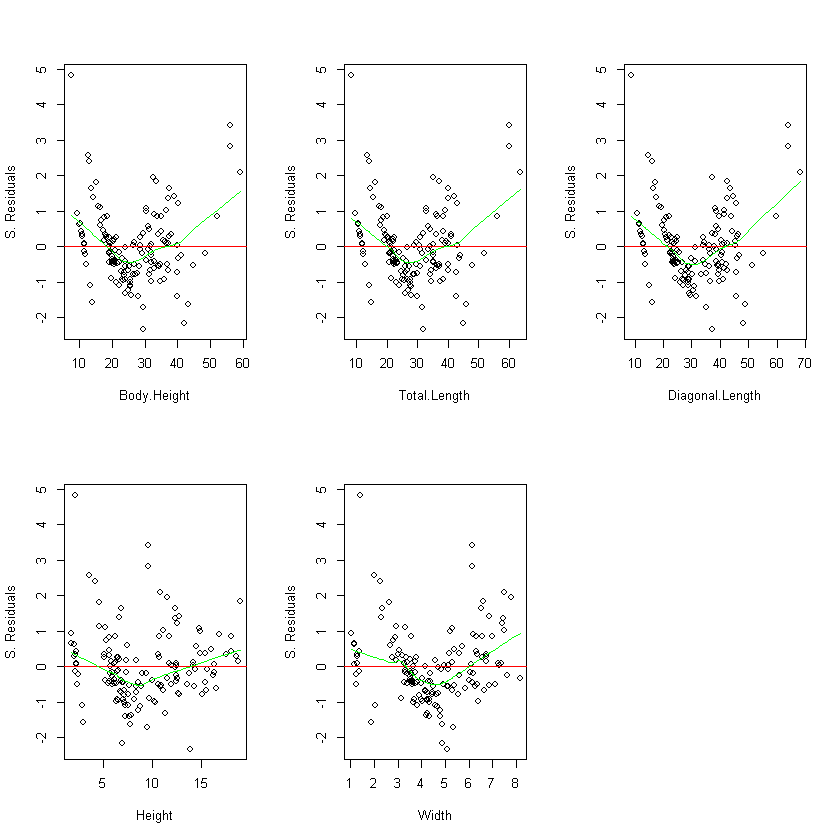

In [18]:
resids =rstandard(model2)
par(mfrow=c(2,3))
for (i in c(3:7)){
col_name = names(fish2[i])
plot(fish2[,i], resids, xlab= col_name, ylab = "S. Residuals")
abline(h=0, col="red")
lines(lowess(fish2[,i], resids), col='green')
}


Linearity assumption does not appear to hold for all predictors as the trend line for all residuals appear to have a U-shape to them.

**(b) Create a scatter plot of the standardized residuals of model2 versus the fitted values of model2.  Does the constant variance assumption appear to hold?  Do the errors appear uncorrelated?**

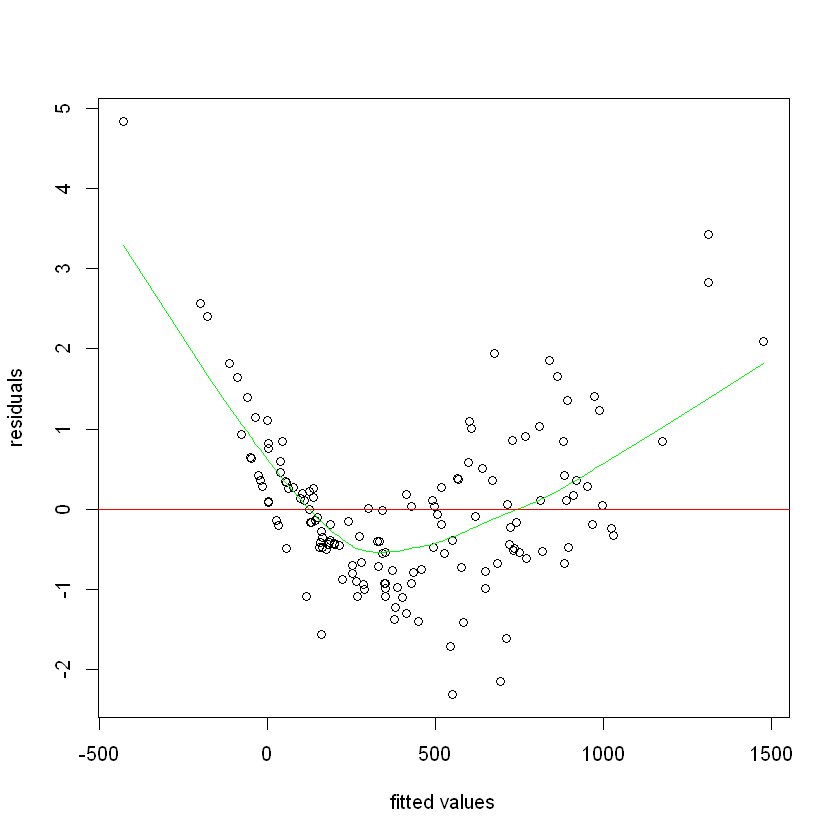

In [20]:
plot(model2$fitted.values, resids, xlab="fitted values", ylab="residuals")
lines(lowess(model2$fitted.values, resids), col='green')
abline(h=0, col="red")

Variance appears to increase as fitted values increase, meaning that constant variance does not hold.

There is a potential cluster near ~200 in fitted values but largely the errors appear uncorrelated.

**(c) Create a histogram and normal QQ plot for the standardized residuals. What conclusions can you draw from these plots?**

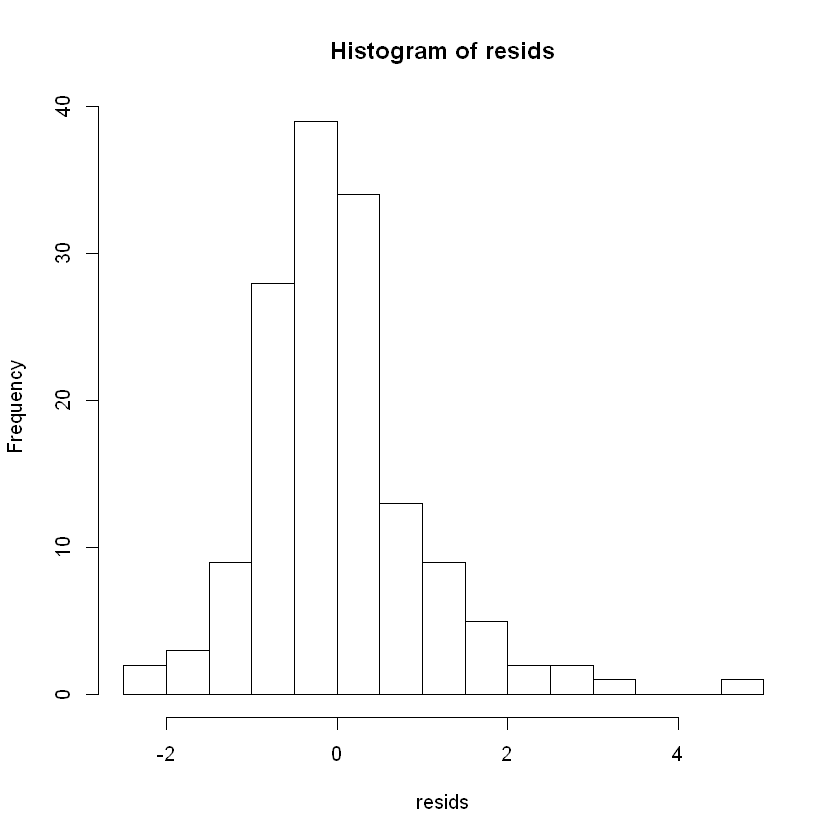

37 124 
 36 123

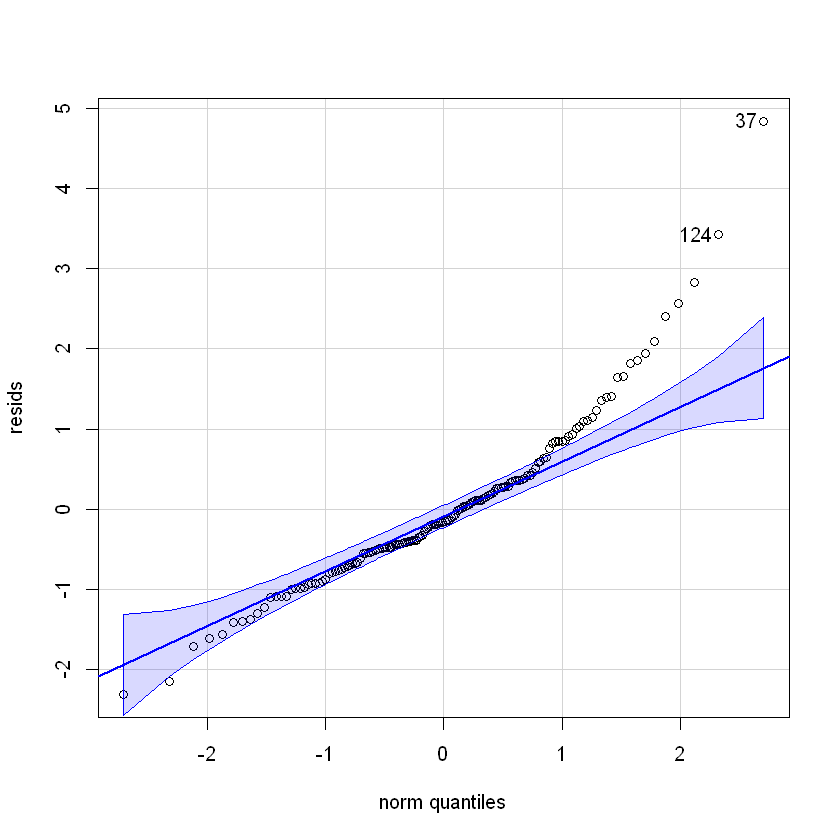

In [22]:
hist(resids, nclass=15)
qqPlot(resids)

Normality doesn't appear to hold from either chart on the right tails. Transforming the response variable might result in a better model.


# Question 5: Partial F Test [6 points]

**(a) Build a third multiple linear regression model using the cleaned data set without the outlier(s), called model3, using only *Species* and *Total.Length* as predicting variables and *Weight* as the response.  Display the summary table of the model3.**

In [23]:
model3<-lm(Weight~Species+Total.Length, data=fish2)

summary(model3)



Call:
lm(formula = Weight ~ Species + Total.Length, data = fish2)

Residuals:
    Min      1Q  Median      3Q     Max 
-233.83  -56.59  -10.13   34.58  418.30 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -730.977     42.449 -17.220  < 2e-16 ***
SpeciesParkki      63.129     38.889   1.623    0.107    
SpeciesPerch      -23.941     21.745  -1.101    0.273    
SpeciesPike      -400.964     33.350 -12.023  < 2e-16 ***
SpeciesRoach      -19.876     30.111  -0.660    0.510    
SpeciesSmelt      256.408     39.858   6.433 1.85e-09 ***
SpeciesWhitefish  -14.971     42.063  -0.356    0.722    
Total.Length       40.775      1.181  34.527  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 94.86 on 140 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9321 
F-statistic: 289.1 on 7 and 140 DF,  p-value: < 2.2e-16


**(b) Conduct a partial F-test comparing model3 with model2. What can you conclude using an $\alpha$ level of 0.01?**

In [24]:
anova(model3, model2)


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
140,1259746,NA,NA,NA,NA
136,1197659,4,62086.66,1.762561,0.1399744


We fail to reject the null hypothesis and so the additional predictors do not provide additional explanatory power. 


# Question 6: Reduced Model Residual Analysis and Multicollinearity Test [7 points]

**(a) Conduct a multicollinearity test on model3.  Comment on the multicollinearity in model3.**

In [27]:
cat("VIF threshold:", max(10, 1/(1-summary(model3)$r.squared)))
vif(model3)

VIF threshold: 15.45466

,GVIF,Df,GVIF^(1/(2*Df))
Species,2.654472,6,1.084755
Total.Length,2.654472,1,1.629255


Multicollinearity is not a problem in the model as both predictors fall below the VIF threshold.


**(b) Conduct residual analysis for model3 (similar to Q4). Comment on each assumption and whether they hold.**

37 124 
 36 123

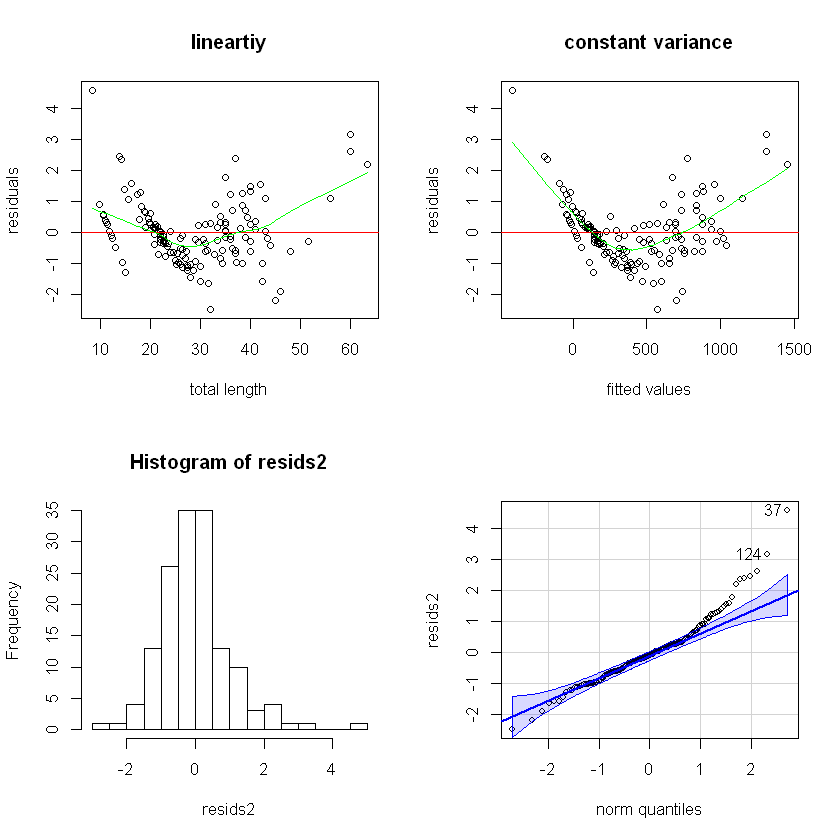

In [28]:
resids2 =rstandard(model3)

par(mfrow=c(2,2))
plot(fish2$Total.Length, resids2 , main="lineartiy",
xlab="total length", ylab="residuals")
abline(h=0, col="red")
lines(lowess(fish2$Total.Length, resids2), col='green')
plot(model3$fitted.values, resids2 , main="constant variance",
xlab="fitted values", ylab="residuals")
abline(h=0, col="red")
lines(lowess(model3$fitted.values, resids2), col='green')
hist(resids2 , nclass=15)
qqPlot(resids2)

Plots look similar to model2 with increasinng variance and heavy right tails. 

Thus, linearity, constant variance, and normality assumptions do not hold.

# Question 7: Transformation [9 pts]

**(a) Use model3 to find the optimal lambda, rounded to the nearest 0.5, for a Box-Cox transformation on model3.  What transformation, if any, should be applied according to the lambda value?  Please ensure you use model3**

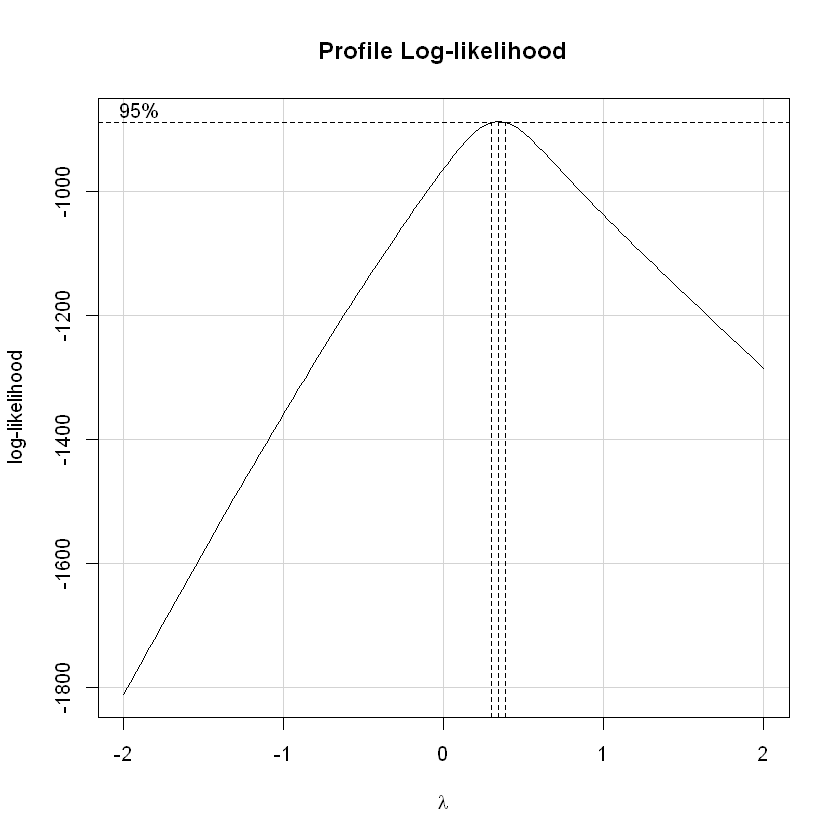

In [30]:
boxCox(model3)


In [33]:
opt.lambda<-bc$x[which.max(bc$y)]

cat(round(opt.lambda/0.5)*0.5)

0.5

Optimal lambda is 0.5, meaning a square root transformation of the response.

**(b) Based on the results in (a), create model4 with the appropriate transformation. Display the summary.**

In [34]:
model4<-lm(Weight^(1/2)~ Species + Total.Length, data=fish2)
summary(model4)


Call:
lm(formula = Weight^(1/2) ~ Species + Total.Length, data = fish2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0111 -0.7687 -0.0579  0.6797  4.6383 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -6.96654    0.57278 -12.163  < 2e-16 ***
SpeciesParkki     -0.36404    0.52476  -0.694   0.4890    
SpeciesPerch      -1.95734    0.29342  -6.671 5.46e-10 ***
SpeciesPike      -10.90490    0.45001 -24.233  < 2e-16 ***
SpeciesRoach      -2.09340    0.40630  -5.152 8.58e-07 ***
SpeciesSmelt      -1.04994    0.53782  -1.952   0.0529 .  
SpeciesWhitefish  -0.55048    0.56758  -0.970   0.3338    
Total.Length       0.95052    0.01594  59.649  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.28 on 140 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9808 
F-statistic:  1074 on 7 and 140 DF,  p-value: < 2.2e-16


**(c) Perform Residual Analysis on model4. Comment on each assumption.  Was the transformation successful/unsuccessful?**

131 141 
130 140

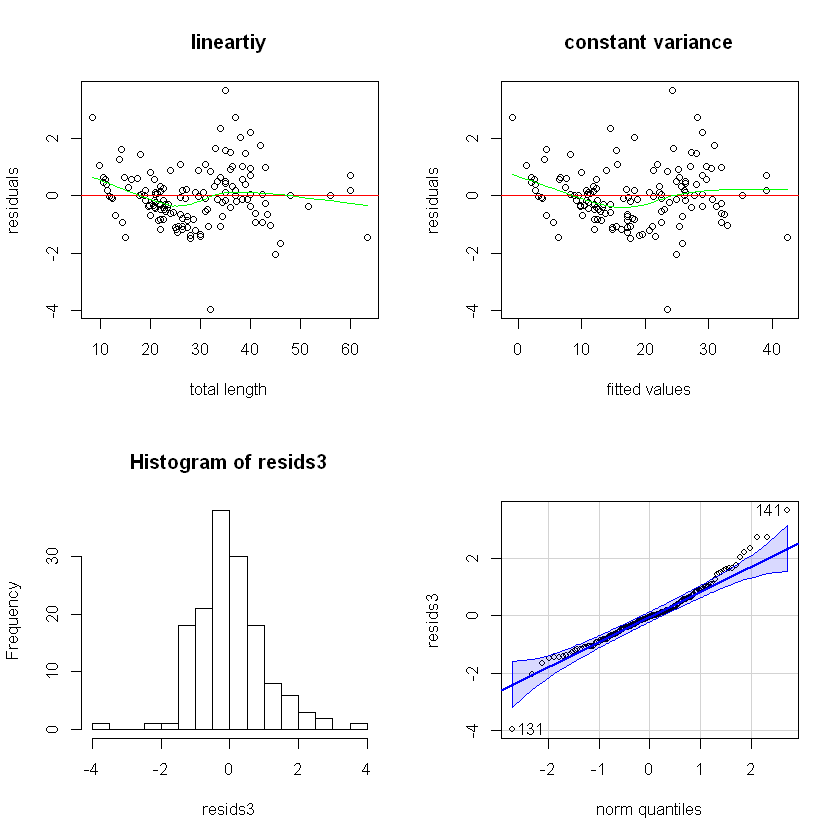

In [35]:
resids3 =rstandard(model4)

par(mfrow=c(2,2))
plot(fish2$Total.Length, resids3, main="lineartiy",
xlab="total length", ylab="residuals")
abline(h=0, col="red")
lines(lowess(fish2$Total.Length, resids3), col='green')
plot(model4$fitted.values, resids3, main="constant variance",
xlab="fitted values", ylab="residuals")
abline(h=0, col="red")
lines(lowess(model4$fitted.values, resids3), col='green')
hist(resids3, nclass=15)
qqPlot(resids3)


Linearity assumption appears to hold as residuals are randomly scattered about 0.

Variance does not appear to increase/decrease as values increase, so constant variance assumption holds.

Normality appears to hold from the histogram and QQplot.

Overall, transformation appears successful.

# Question 8: Model Comparison  [2 pts]

**(a) Using each model summary, compare and discuss the R-squared and Adjusted R-squared of model2, model3, and model4.**



Model4 has a much higher (~0.05) Rsquared and Adjusted R value compared to model2 & model3. So, model4 appears to be the superior model among the 3.

# Question 9: Prediction [8 points]

**(a) Predict Weights for the last 10 rows of data (fishtest) using both model3 and model4.  Compare and discuss the mean squared prediction error (MSPE) of both models.**

In [40]:
pred3<-predict(model3, fishtest)
mse.model3<-mean((pred3-fishtest$Weight)^2)

pred4<-predict(model4, fishtest)^2
mse.model4<-mean((pred4-fishtest$Weight)^2)

cat("model3 MSPE: ", mse.model3)

model3 MSPE:  9392.25

In [41]:
cat("model4 MSPE: ", mse.model4)

model4 MSPE:  2442.998

Model4's MSPE is smaller and would be preferred over model3.

**(b) Suppose you have found a Perch fish with a Body.Height of 28 cm, and a Total.Length of 32 cm. Using model4, predict the weight on this fish with a 90% prediction interval.  Provide an interpretation of the prediction interval.**

In [42]:
perch<-data.frame(Species="Perch", Total.Length=32)

predict(model4, perch, interval="prediction", level=0.9)^2

fit,lwr,upr
461.9429,374.4536,558.6091


Using the perch fish measurements provided, model4 predicts the perch to weigh 461.9429 grams with a 90% confidence interval of 374 and 558grams.